In [56]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict


In [61]:
def draw_bipartite_matching(original_graph, matching_edges, left_nodes, right_nodes, title="Grafo Bipartido"):
    pos = {}
    pos.update((n, (0, i)) for i, n in enumerate(left_nodes))
    pos.update((n, (1, i)) for i, n in enumerate(right_nodes))
    
    # Só usa as arestas originais (sem reversas)
    #display_edges = [(u, v) for u, v in original_edges if G.has_edge(u, v)]
    display_edges = original_graph.edges
    # Matching = arestas com capacidade 0 (ou seja, fluxo 1)
    #matching_edges = [(u, v) for u, v in display_edges if G[u][v]['capacity'] == 0]
    
    #print(display_edges)
    #print(matching_edges)
    # Cores das arestas
    edge_colors = ['blue' if (u, v) in matching_edges else 'black' for (u, v) in display_edges]

    # Subgrafo apenas com nós bipartidos
    B = nx.DiGraph()
    B.add_nodes_from(left_nodes + right_nodes)
    B.add_edges_from(display_edges)

    plt.figure(figsize=(8, 6))
    nx.draw(
        B, pos, with_labels=True, node_size=1000, node_color='lightblue',
        edge_color=edge_colors, width=2, connectionstyle='arc3,rad=0.1'
    )
    plt.title(title)
    plt.axis('off')
    plt.show()


In [62]:
def ford_fulkerson(G, source, sink):
    flow = 0
    parent = {}

    def dfs(u, visited):
        if u == sink:
            return True
        visited.add(u)
        for v in G[u]:
            if v not in visited and G[u][v]['capacity'] > 0:
                parent[v] = u
                if dfs(v, visited):
                    return True
        return False

    while True:
        visited = set()
        parent = {}
        if not dfs(source, visited):
            break

        # encontra capacidade mínima no caminho
        path_flow = float('inf')
        s = sink
        while s != source:
            path_flow = min(path_flow, G[parent[s]][s]['capacity'])
            s = parent[s]

        # atualiza capacidades
        v = sink
        while v != source:
            u = parent[v]
            G[u][v]['capacity'] -= path_flow
            if G.has_edge(v, u):
                G[v][u]['capacity'] += path_flow
            else:
                G.add_edge(v, u, capacity=path_flow)
            v = u

        flow += path_flow

    return flow


In [65]:
# Grupos bipartidos
left = ['A', 'B', 'C']
right = ['1', '2', '3']

# Relações possíveis (arestas bipartidas)
edges = [
    ('A', '1'), ('A', '2'),
    ('B', '1'), ('B', '3'),
    ('C', '2')
]

# Criação do grafo
G = nx.DiGraph()


# Fonte e sorvedouro
source = 'S'
sink = 'T'


# Arestas bipartidas
for u, v in edges:
    G.add_edge(u, v, capacity=1)


# Arestas da fonte para o conjunto esquerdo
for u in left:
    G.add_edge(source, u, capacity=1)

# Arestas do conjunto direito para o sorvedouro
for v in right:
    G.add_edge(v, sink, capacity=1)

original_graph = G


# Executa o algoritmo
max_matching = ford_fulkerson(G, source, sink)
print(f"Matching máximo: {max_matching}")


Matching máximo: 3


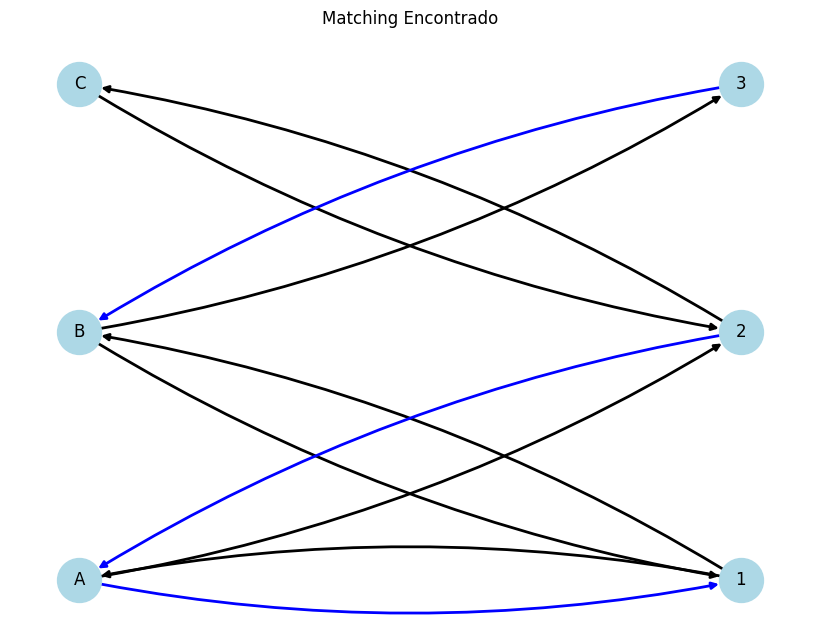

In [67]:
# Extrai o matching baseado no fluxo residual
matching = []
for u in left:
    for v in G.successors(u):
        if v in right and G[u][v]['capacity'] == 0:
            matching.append((u, v))

draw_bipartite_matching(original_graph.subgraph(left+right), matching, left, right, title="Matching Encontrado")
#draw_bipartite_matching(G, matching, left, right, title="Matching Encontrado")
